```fortran
d18Ore[0, 0:17, :, :] = d18Ore[0, 0:17, :, :] + 0.15
```

In [1]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import datetime
import scipy.io
import scipy.signal
import numpy as np
import netCDF4 as nc
import cartopy.feature
import cartopy.crs as ccrs # ccrs
#import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [4]:
lnum=0
FName1 = '/ocean/yingkai/GEOTRACES/Simulations/SPIN06_SET02_1m_20020101_20131231_ptrc_T.nc'
FName2 = '/ocean/yingkai/GEOTRACES/Simulations/SET03_1m_20020101_20131231_ptrc_T.nc'
ptrc_obj1 = nc.Dataset(FName1)
ptrc_obj2 = nc.Dataset(FName2)
nav_lon = ptrc_obj1.variables['nav_lon'][:]
nav_lat = ptrc_obj1.variables['nav_lat'][:]
d18O1 = np.squeeze(ptrc_obj1.variables['d18O'][:, lnum, :, :]); d18O1[d18O1==0]=np.nan
d18O2 = np.squeeze(ptrc_obj2.variables['d18O'][:, lnum, :, :]); d18O2[d18O2==0]=np.nan

In [9]:
y = np.zeros([8, 144])

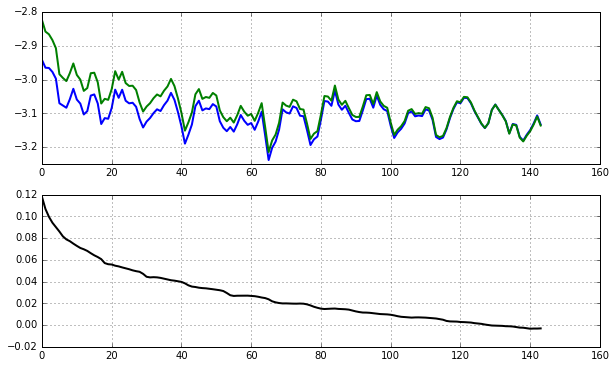

In [10]:
y[0, :] = np.nanmean(np.nanmean(d18O2, 1), 1)-np.nanmean(np.nanmean(d18O1, 1), 1)

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(np.nanmean(np.nanmean(d18O1, 1), 1), lw=2)
ax1.plot(np.nanmean(np.nanmean(d18O2, 1), 1), lw=2)
ax2.plot(np.nanmean(np.nanmean(d18O2, 1), 1)-np.nanmean(np.nanmean(d18O1, 1), 1), 'k-', lw=2)

In [6]:
from dateutil.relativedelta import relativedelta

base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

In [7]:
rf_name=glob.glob('_data/Samples/STN-30p/runoff_id_modified.mat')
rf_obj=scipy.io.loadmat(rf_name[0])
rf_id=rf_obj['rf_id']
rf_lon=rf_obj['lon']
rf_lat=rf_obj['lat']
rf_id[rf_id==2]=0 # 0 is Central Arctic

In [11]:
d18O_temp = d18O1[0, :, :]
Class_interp = Nts.reporj_NEMOgrid(rf_lon, rf_lat, rf_id, nav_lon, nav_lat, method='nearest')
Class_range = Nts.reporj_NEMOgrid(rf_lon, rf_lat, rf_id, nav_lon, nav_lat, method='linear')
Class_interp[np.isnan(Class_range)] = np.nan
Class_interp[np.isnan(d18O_temp)] = np.nan
Class_masked = np.ma.masked_where(np.isnan(Class_interp), Class_interp)

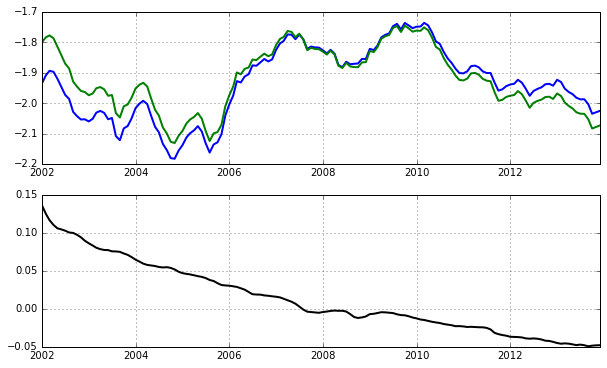

In [12]:
y1 = np.nanmean(d18O1[:, Class_interp==0], 1)
y2 = np.nanmean(d18O2[:, Class_interp==0], 1)
y[1, :] = y2-y1

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

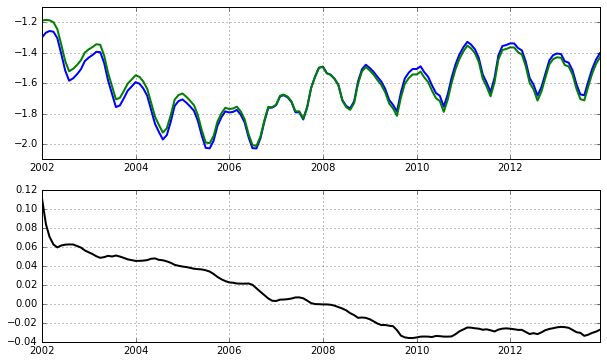

In [13]:
y1 = np.nanmean(d18O1[:, Class_interp==3], 1)
y2 = np.nanmean(d18O2[:, Class_interp==3], 1)
y[2, :] = y2-y1

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

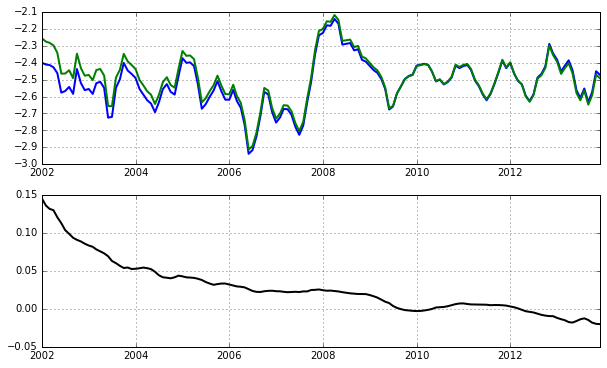

In [14]:
y1 = np.nanmean(d18O1[:, Class_interp==5], 1)
y2 = np.nanmean(d18O2[:, Class_interp==5], 1)
y[3, :] = y2-y1

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

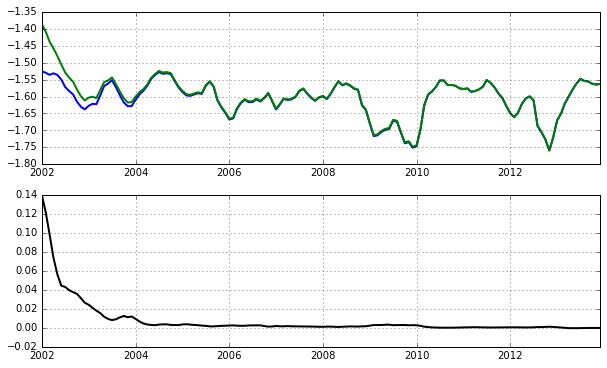

In [15]:
y1 = np.nanmean(d18O1[:, Class_interp==7], 1)
y2 = np.nanmean(d18O2[:, Class_interp==7], 1)
y[4, :] = y2-y1

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

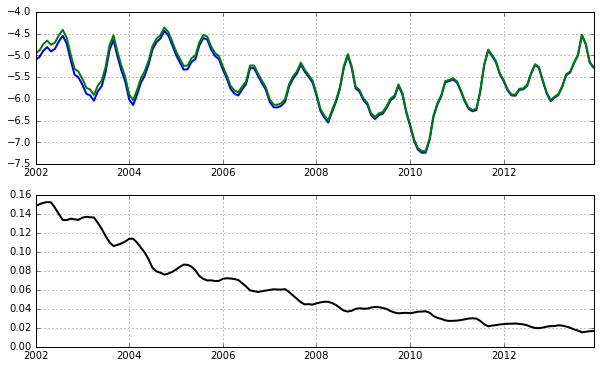

In [16]:
y1 = np.nanmean(d18O1[:, Class_interp==8], 1)
y2 = np.nanmean(d18O2[:, Class_interp==8], 1)
y[5, :] = y2-y1


fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

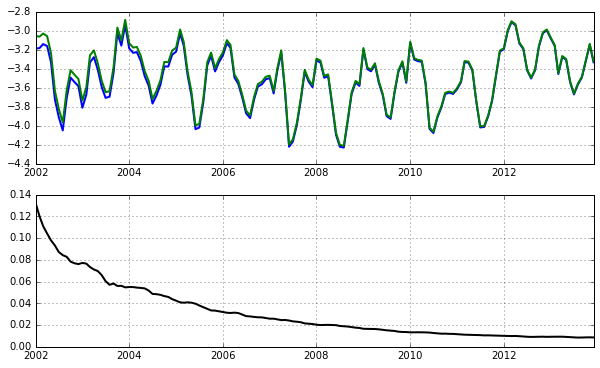

In [17]:
y1 = np.nanmean(d18O1[:, Class_interp==12], 1)
y2 = np.nanmean(d18O2[:, Class_interp==12], 1)
y[6, :] = y2-y1

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

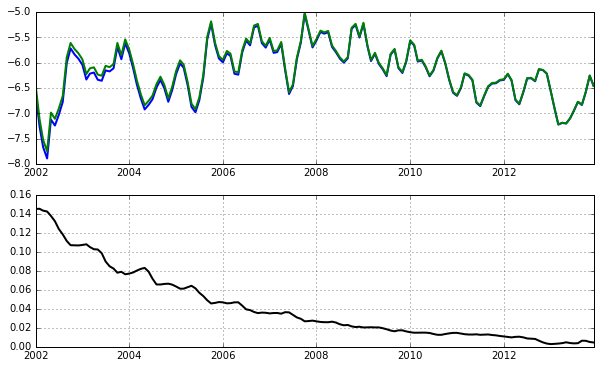

In [18]:
y1 = np.nanmean(d18O1[:, Class_interp==13], 1)
y2 = np.nanmean(d18O2[:, Class_interp==13], 1)
y[7, :] = y2-y1


fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

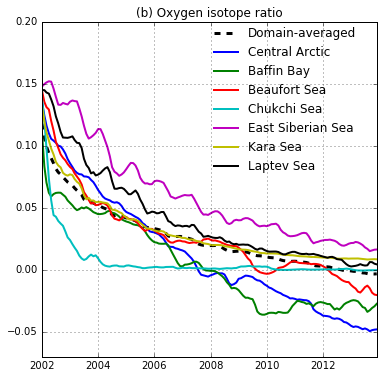

In [25]:
labels = ["Domain-averaged", "Central Arctic", "Baffin Bay", "Beaufort Sea", "Chukchi Sea", "East Siberian Sea", "Kara Sea", "Laptev Sea"]

fig = plt.figure(figsize=(6, 6)); ax = fig.gca(); ax.grid()
ax.plot(date_list, y[0, :].T, 'k--', lw=3, label="Domain-averaged")
for i in range(1, 8):
    ax.plot(date_list, y[i, :].T, lw=2, label=labels[i])

LG = ax.legend(numpoints=1, bbox_to_anchor=(0.5, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)    

#ax.set_ylabel('perturbed run - base run')
ax.set_ylim([-0.07, 0.2])
ax.set_title('(b) Oxygen isotope ratio')
fig.savefig('_publish/FIG15_2.pdf', dpi=400, orientation='portrait', papertype='a4', format='pdf',
                bbox_inches='tight', pad_inches=0.1)

In [57]:
lev1 = np.array([-5.25, -4.25, -3.25, -2.25, -1.25, -0.25, 0.25, 1.25, 2.25, 3.25, 4.25, 5.25])
lev2 = np.array([-2.25, -1.25, -0.25, 0.25, 1.25, 2.25])/15
def base_vs_perturbe(date_list, d18O1, d18O2, time):
    
    fig=plt.figure(figsize=(15, 15));
    
    ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
    ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
    #ax = fig.gca()
    
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax1)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    CS=proj.contourf(x, y, d18O1[time, :, :], lev1, cmap=cm.GMT_no_green, extend='both')
    proj.contour(x, y, d18O1[time, :, :], lev1, linewidths=0.5, colors=('gray',))
    ax1.set_title('Base run '+date_list[time].strftime("%Y-%m"))

    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax2)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    CS=proj.contourf(x, y, d18O2[time, :, :], lev1, cmap=cm.GMT_no_green, extend='both')
    proj.contour(x, y, d18O2[time, :, :], lev1, linewidths=0.5, colors=('gray',))
    ax2.set_title('Perturbed run '+date_list[time].strftime("%Y-%m"))
    return fig, ax, CS

def cal_diff(date_list, d18O1, d18O2, time):
    
    fig=plt.figure(figsize=(8, 8));
    ax1 = fig.gca()
    
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax1)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    CS=proj.contourf(x, y, d18O2[time, :, :]-d18O1[time, :, :], lev2, cmap=plt.cm.RdBu_r, extend='both')
    proj.contour(x, y, d18O2[time, :, :]-d18O2[time, :, :], lev2, linewidths=0.5, colors=('gray',))
    ax1.set_title('Perturbed - Base | '+date_list[time].strftime("%Y-%m"))
    return fig, ax, CS

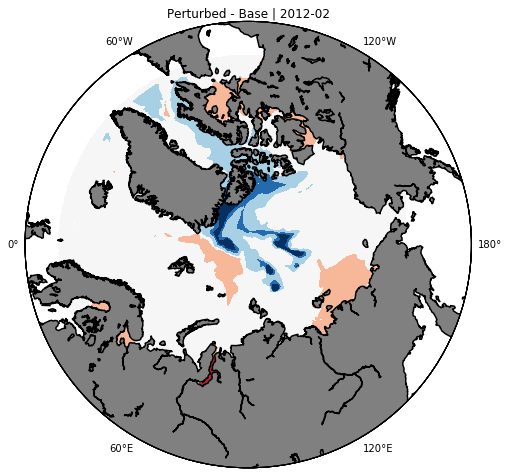

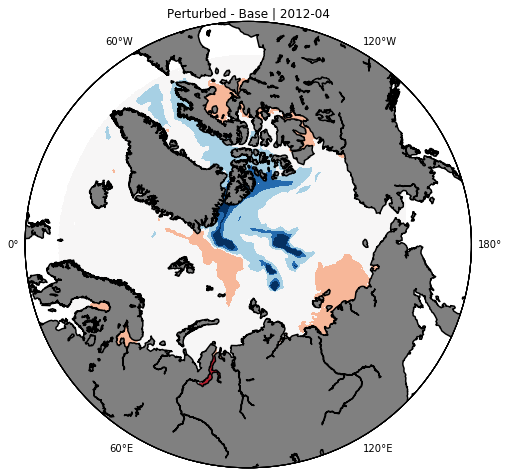

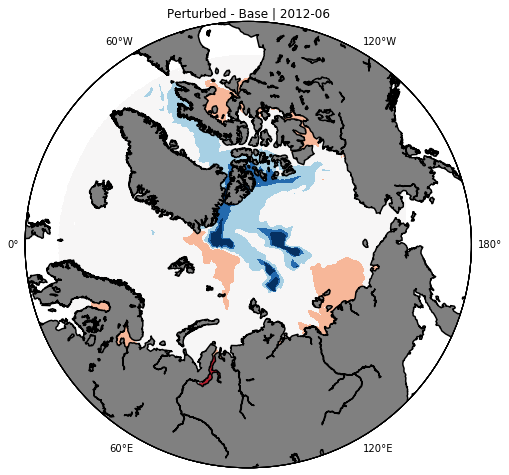

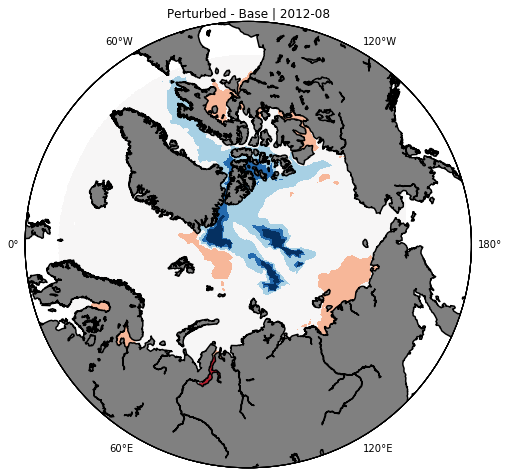

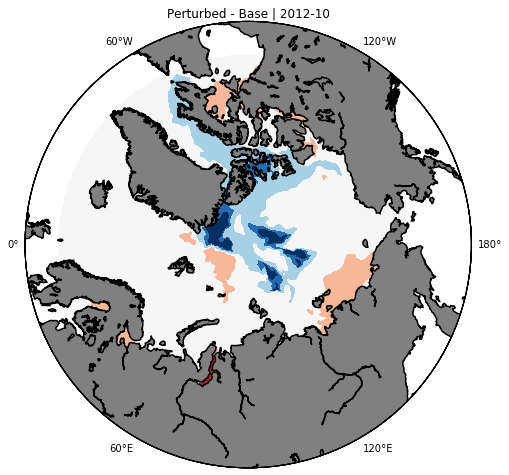

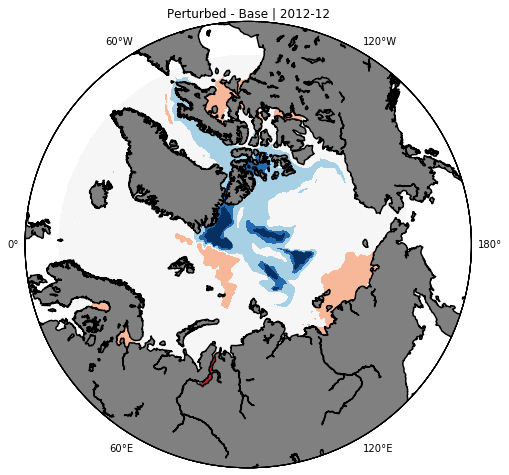

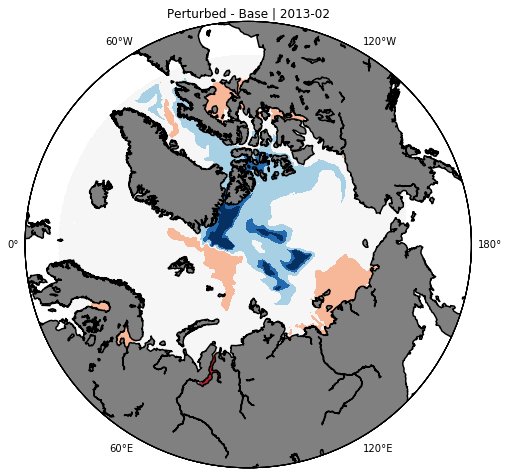

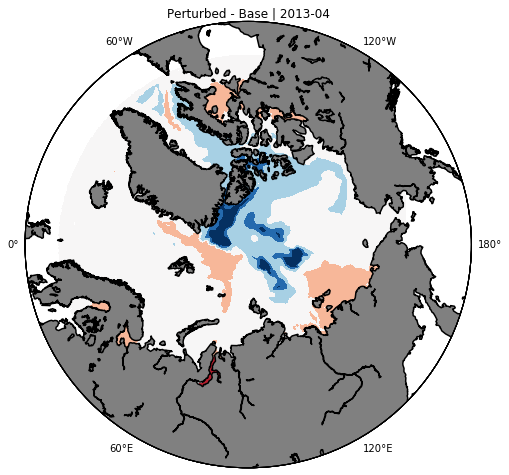

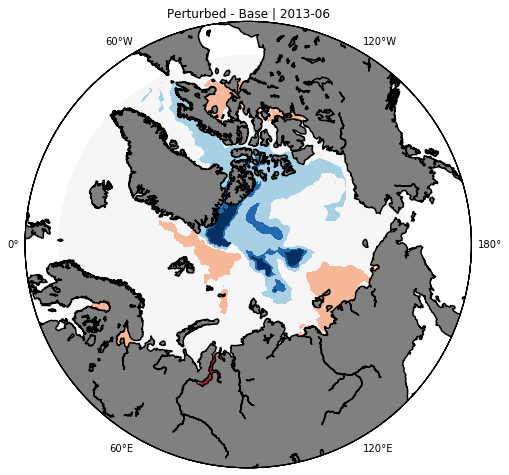

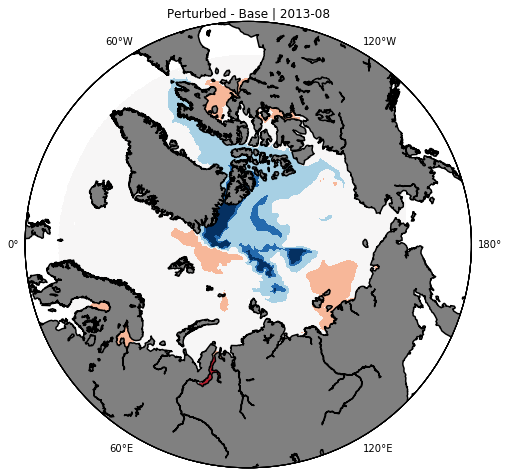

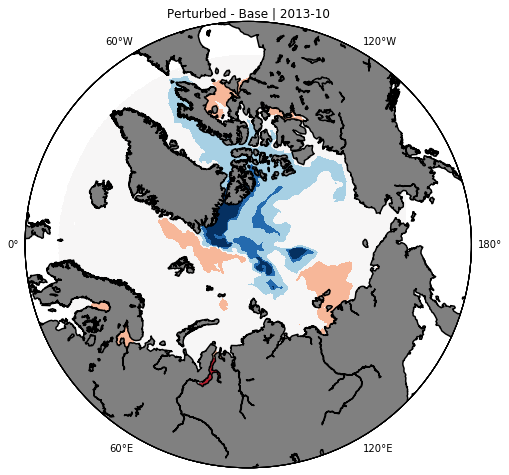

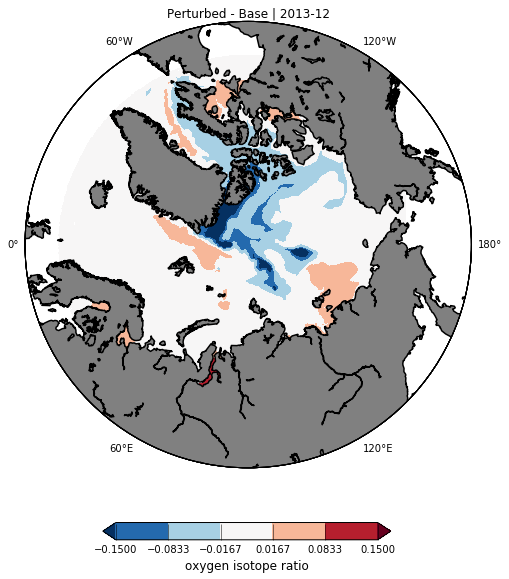

In [55]:
for i in range(12*10+1, 144, 2):
    fig, ax, CS = cal_diff(date_list, d18O1, d18O2, i)

cax = fig.add_axes([0.26, 0, 0.5, 0.030])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('oxygen isotope ratio', fontsize=12)
CBar.ax.tick_params(axis='x', length=16)
CBar.set_ticks(lev2)

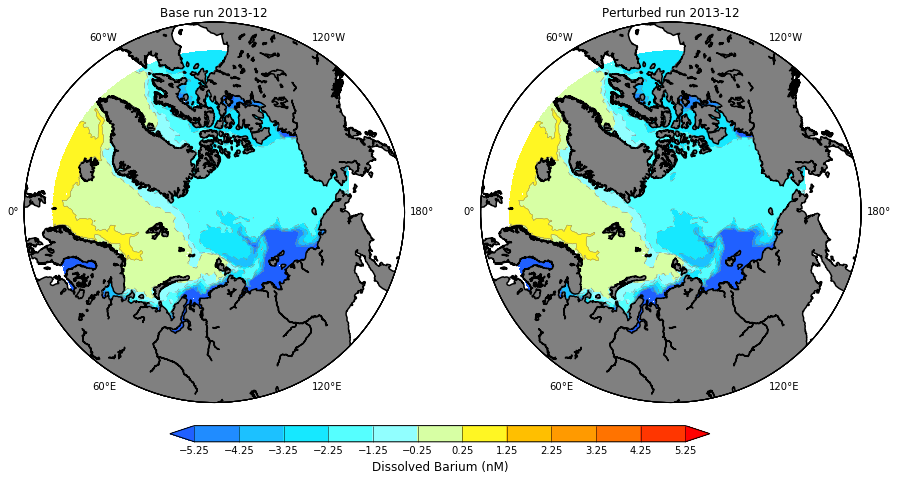

In [58]:
fig, ax, CS = base_vs_perturbe(date_list, d18O1, d18O2, 143)
cax = fig.add_axes([0.26, 0.3, 0.5, 0.015])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Dissolved Barium (nM)', fontsize=12)
CBar.ax.tick_params(axis='x', length=16)
CBar.set_ticks(lev1)